# Cuaderno de pruebas

## Zak phase

(<Figure size 640x640 with 2 Axes>, <Axes: >)

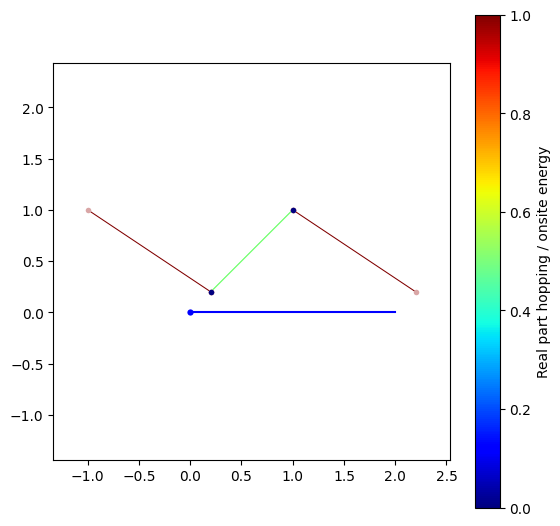

In [1]:
from pythtb import *  
from pylab import *

def SSH_model(v=1,w=1):
  lat=[[2,0],[0,2]]
  sites=[[0.1,0.1],[0.5,0.5]]
  SSH=tb_model(1,2,lat,sites,per=[0])
  SSH.set_hop(w,1,0,[1,0])
  SSH.set_hop(v,0,1,[0,0])
  SSH.set_onsite([0,0])
  return SSH

SSH_model(v=0.5).visualize(0,1)

In [2]:
my_model= SSH_model(v=0)

my_array_1=wf_array(my_model,[41])
# solve model on a regular grid, and put origin of
# Brillouin zone at -1/2 -1/2 point
my_array_1.solve_on_grid([0.5])

my_array_1.berry_phase([0,1],dir=0,berry_evals=True)#[0,1],0) #,contin=True)

array([-3.14159265,  0.62831853])

In [28]:
def Zak_Phase(model,nkx=31):
  K_array=wf_array(model,[101])
  kx=np.linspace(-0.5,0.5,num=nkx)
  for i in range(nkx):
    (eval,evec)=my_model.solve_one(kx[i],eig_vectors=True)
    # store wavefunctions
    K_array[i]=evec
#  K_array.solve_on_grid([0.])
  return K_array.berry_phase(berry_evals=True)

Zak_Phase(SSH_model(v=3.6),nkx=31)

array([ 3.14159265e+00, -4.82253126e-16])

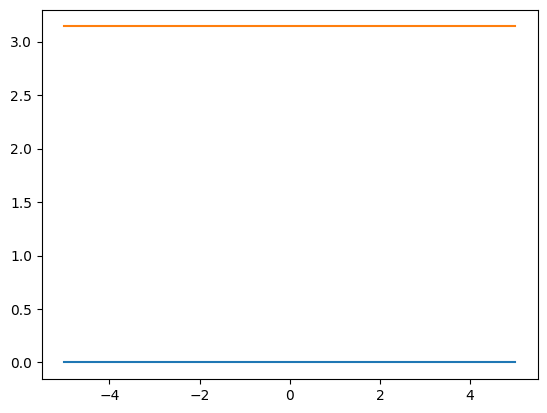

In [29]:
V=linspace(-5,5,31)
ZP=[Zak_Phase(SSH_model(v=v)) for v in V]
plot(V,np.array(ZP).T[1])
plot(V,np.array(ZP).T[0])

In [14]:
def HamSSH(v,w=1):
    def H(k): 
        model=SSH_model(v=v,w=w)
        return model._gen_ham(k)
    return H

def Zak(H): # Given the hamiltonian in k space, calculates the Zak phase
    kpath = np.linspace(0,1,101) #,endpoint=False)
    Ek,vk = eig(H(kpath[-1]))
    uN    = vk.T[Ek<0]
    Ek,vk = eig(H(kpath[0]))
    u0    = vk.T[Ek<0]
    Prod  = np.vdot(uN,u0)
    un1   = u0
    for k in kpath[1:]:
        Ek,vk = eig(H(k))
        un   = vk.T[Ek<0]
        Prod  = Prod*np.vdot(un1,un)
        un1   = un
    if(Prod!=0):
      ϕ = -imag( log(Prod) )
      if(ϕ<-10**(-10)): ϕ=ϕ+2*np.pi # We use the log branch [0,2*pi) with 10 digits of resolution
    else:
      ϕ=0
    return ϕ


In [13]:
def Zak(H): # Given the hamiltonian in k space, calculates the Zak phase
    kpath = np.linspace(0,1,101) #,endpoint=False)
    Ek,vk=[],[]
    for k in kpath:
       eig_k = eig(H(k))
       Ek.append(eig_k[0])
       vk.append(eig_k[1])
    for band in 
    Ek,vk = eig(H(kpath[-1]))
    uN    = vk.T[Ek<0]
    Ek,vk = eig(H(kpath[0]))
    u0    = vk.T[Ek<0]
    Prod  = np.vdot(uN,u0)
    un1   = u0
    for k in kpath[1:]:
        Ek,vk = eig(H(k))
        un   = vk.T[Ek<0]
        Prod  = Prod*np.vdot(un1,un)
        un1   = un
    if(Prod!=0):
      ϕ = -imag( log(Prod) )
      if(ϕ<-10**(-10)): ϕ=ϕ+2*np.pi # We use the log branch [0,2*pi) with 10 digits of resolution
    else:
      ϕ=0
    return ϕ

SyntaxError: invalid syntax (2509297374.py, line 8)

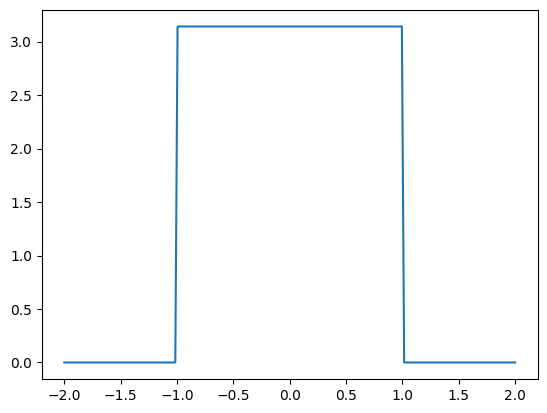

In [15]:
V=linspace(-2,2,200)
ZP=np.array([Zak(HamSSH(v=v)) for v in V])
plot(V,ZP)

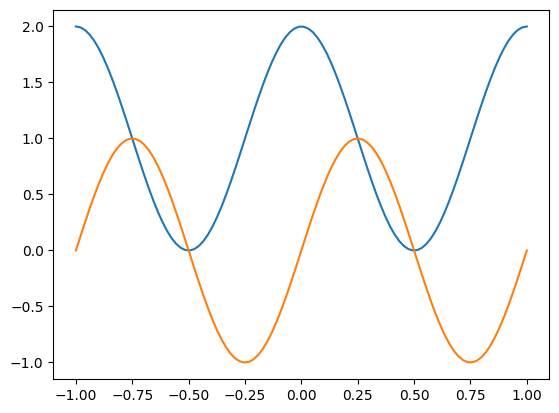

In [10]:
k=linspace(-1,1,100)
def HamSSH(v,w=1):
    def H(k): 
        model=SSH_model(v=v,w=w)
        return model._gen_ham(k)[1,0]
    return H
Ham=np.array(list(map(HamSSH(v=1.,w=1),k)))
plot(k,np.real(Ham))
plot(k,np.imag(Ham))
#plot(k,(Ham))

## Chern number

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.5
 #  1  ===>       0.5
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
<  0 | H |  0 + [  1 ,  0 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  1 , -1 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  0 ,  1 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  1 ,  0 ] >     ===>      0.0 -    0.15 i
<  0 | H |  0 + [  1 , -

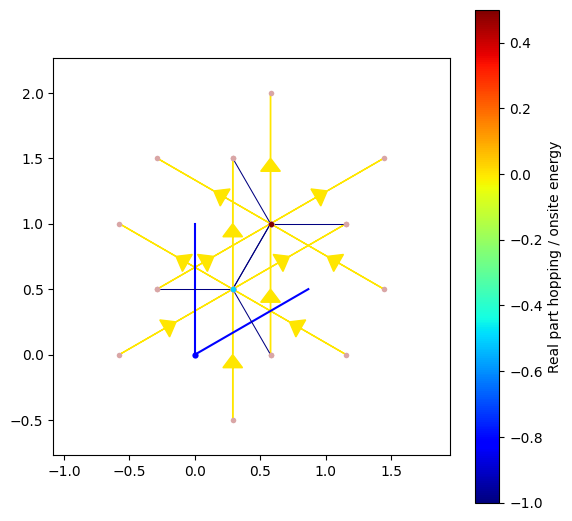

In [1]:
#!/usr/bin/env python

# Haldane model from Phys. Rev. Lett. 61, 2015 (1988)
# Calculates Berry phases and curvatures for this model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding Haldane model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=0.5
t=-1.0
t2 =0.15*np.exp((1.j)*np.pi/2.)
t2c=t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2 , 0, 0, [ 1, 0])
my_model.set_hop(t2 , 1, 1, [ 1,-1])
my_model.set_hop(t2 , 1, 1, [ 0, 1])
my_model.set_hop(t2c, 1, 1, [ 1, 0])
my_model.set_hop(t2c, 0, 0, [ 1,-1])
my_model.set_hop(t2c, 0, 0, [ 0, 1])

# print tight-binding model details
my_model.display()
my_model.visualize(1,0)

print(r"Using approach #1")
# approach #1
# generate object of type wf_array that will be used for
# Berry phase and curvature calculations
my_array_1=wf_array(my_model,[31,31])
# solve model on a regular grid, and put origin of
# Brillouin zone at -1/2 -1/2 point
my_array_1.solve_on_grid([-0.5,-0.5])

# calculate Berry phases around the BZ in the k_x direction
# (which can be interpreted as the 1D hybrid Wannier center
# in the x direction) and plot results as a function of k_y
#
# Berry phases along k_x for lower band
phi_a_1 = my_array_1.berry_phase([0],0,contin=True)
# Berry phases along k_x for upper band
phi_b_1 = my_array_1.berry_phase([1],0,contin=True)
# Berry phases along k_x for both bands
phi_c_1 = my_array_1.berry_phase([0,1],0,contin=True)

# Berry flux for lower band
flux_a_1=my_array_1.berry_flux([0])
print("Chern for lower band=",my_array_1.berry_flux([0])/(2*pi))
print("Chern for upper band=",my_array_1.berry_flux([1])/(2*pi))

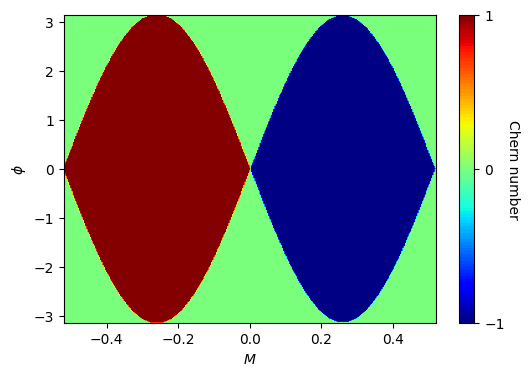

In [2]:
from pythtb import *
from pylab import *

def Haldane_model(t2,phi=0,M=0,tx=1,ty=1,tz=1):
  a1=np.array([3/2,-sqrt(3)/2])
  a2=np.array([3/2,sqrt(3)/2])

  lat=np.array([a1,a2])
  orb=[[1/3,1/3],[2/3,2/3]]

  HM=tb_model(2,2,lat,orb)
  HM.set_hop(tx,0,1,[0,0]) 
  HM.set_hop(ty,1,0,[0,1])
  HM.set_hop(tz,1,0,[1,0])

  HM.set_hop(t2*exp(1j*phi),0,0,[1,0])
  HM.set_hop(t2*exp(1j*phi),1,1,[1,-1])
  HM.set_hop(t2*exp(1j*phi),1,1,[0,1])

  HM.set_hop(t2*exp(-1j*phi),1,1,[1,0])
  HM.set_hop(t2*exp(-1j*phi),0,0,[1,-1])
  HM.set_hop(t2*exp(-1j*phi),0,0,[0,1])
  HM.set_onsite([M,-M])

  return HM

def Chern_Number(model):
  K_array=wf_array(model,[31,31])
  K_array.solve_on_grid([-0.5,-0.5])
  Chern = [ K_array.berry_flux([i])/(2*pi) for i in range(model._norb) ]
  return Chern 

t2=0.1
Phi_path,M_path = linspace(-pi,pi,301),linspace(-3*sqrt(3)*t2,3*sqrt(3)*t2,301)

Chern_array = np.array( [[ Chern_Number(Haldane_model(t2,phi=phi,M=M))[0] for phi in Phi_path ] for M in M_path] )

fig,ax=plt.subplots(figsize=(6,4))
X, Y = np.meshgrid(M_path,Phi_path)
cp = ax.contourf(X, Y, Chern_array,cmap='jet',levels=np.linspace(Chern_array.min(),Chern_array.max(),100))
cbar = colorbar(cp,ticks=linspace(Chern_array.min(),Chern_array.max(),3)) 
ax.set_xlabel('$\phi$')
ax.set_ylabel('$M$')
cbar.ax.set_ylabel('Chern number', rotation=270, labelpad = 11)
plt.show()

 Berry flux=  -6.283185307179586
Using approach #2
 Berry flux=  -6.283185307179586
Done.



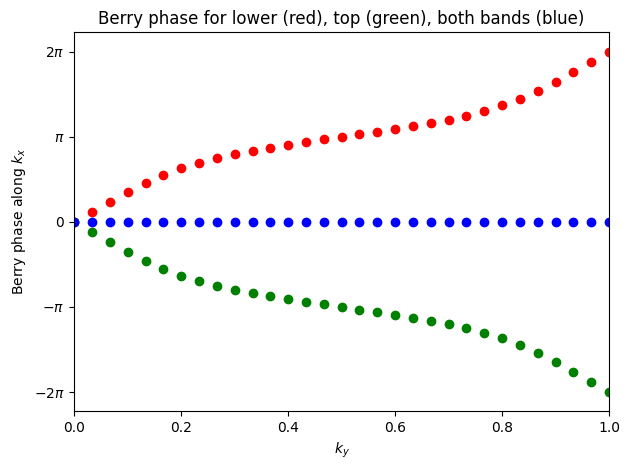

In [8]:
# plot Berry phases
fig, ax = plt.subplots()
ky=np.linspace(0.,1.,len(phi_a_1))
ax.plot(ky,phi_a_1, 'ro')
ax.plot(ky,phi_b_1, 'go')
ax.plot(ky,phi_c_1, 'bo')
ax.set_title("Berry phase for lower (red), top (green), both bands (blue)")
ax.set_xlabel(r"$k_y$")
ax.set_ylabel(r"Berry phase along $k_x$")
ax.set_xlim(0.,1.)
ax.set_ylim(-7.,7.)
ax.yaxis.set_ticks([-2.*np.pi,-np.pi,0.,np.pi,2.*np.pi])
ax.set_yticklabels((r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$', r'$2\pi$'))
fig.tight_layout()
fig.savefig("haldane_bp_phase.pdf")
# print out info about flux
print(" Berry flux= ",flux_a_1)

print(r"Using approach #2")
# approach #2
# do the same thing as in approach #1 but do not use
# automated solver
#
# intialize k-space mesh
nkx=31
nky=31
kx=np.linspace(-0.5,0.5,num=nkx)
ky=np.linspace(-0.5,0.5,num=nky)
# initialize object to store all wavefunctions
my_array_2=wf_array(my_model,[nkx,nky])
# solve model at all k-points
for i in range(nkx):
    for j in range(nky):
        (eval,evec)=my_model.solve_one([kx[i],ky[j]],eig_vectors=True)
        # store wavefunctions
        my_array_2[i,j]=evec
# impose periodic boundary conditions in both k_x and k_y directions
my_array_2.impose_pbc(0,0)
my_array_2.impose_pbc(1,1)
# calculate Berry flux for lower band
flux_a_2=my_array_2.berry_flux([0])

# print out info about curvature
print(" Berry flux= ",flux_a_2)

print('Done.\n')

## DOS

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.2
 #  1  ===>       0.2
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
<  0 | H |  0 + [  1 ,  0 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  1 , -1 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  0 ,  1 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  1 ,  0 ] >     ===>      0.0 -    0.15 i
<  0 | H |  0 + [  1 , -

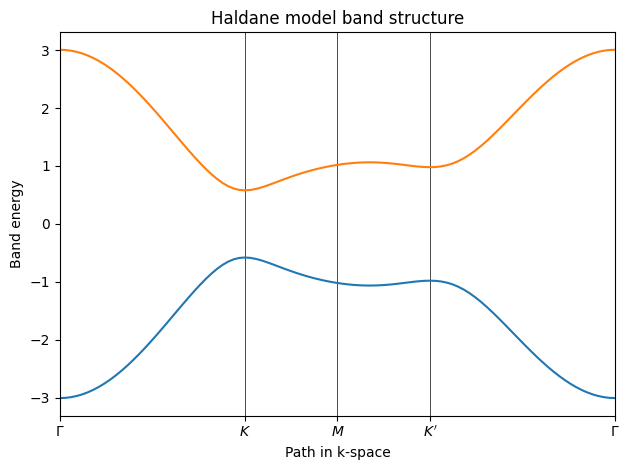

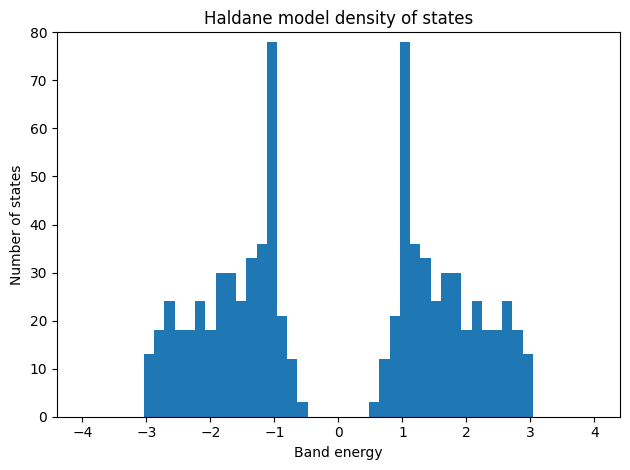

In [1]:
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding Haldane model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=0.2
t=-1.0
t2 =0.15*np.exp((1.j)*np.pi/2.)
t2c=t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2 , 0, 0, [ 1, 0])
my_model.set_hop(t2 , 1, 1, [ 1,-1])
my_model.set_hop(t2 , 1, 1, [ 0, 1])
my_model.set_hop(t2c, 1, 1, [ 1, 0])
my_model.set_hop(t2c, 0, 0, [ 1,-1])
my_model.set_hop(t2c, 0, 0, [ 0, 1])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[1./3.,2./3.], [0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,101)
# inputs:
#   path: see above
#   101: number of interpolated k-points to be plotted
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("Haldane model band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first band
ax.plot(k_dist,evals[0])
# plot second band
ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("haldane_band.pdf")

print()
print('---------------------------------------')
print('starting DOS calculation')
print('---------------------------------------')
print('Calculating DOS...')

# calculate density of states
# first solve the model on a mesh and return all energies
kmesh=20
kpts=[]
for i in range(kmesh):
    for j in range(kmesh):
        kpts.append([float(i)/float(kmesh),float(j)/float(kmesh)])
# solve the model on this mesh
evals=my_model.solve_all(kpts)
# flatten completely the matrix
evals=evals.flatten()

# plotting DOS
print('Plotting DOS...')

# now plot density of states
fig, ax = plt.subplots()
ax.hist(evals,50,range=(-4.,4.))
ax.set_ylim(0.0,80.0)
# put title
ax.set_title("Haldane model density of states")
ax.set_xlabel("Band energy")
ax.set_ylabel("Number of states")
# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("haldane_dos.pdf")

print('Done.\n')

In [10]:
def KaneMele(λI,M,λR=0,t1=1,t2=0):
  a1=np.array([3/2,-sqrt(3)/2])
  a2=np.array([3/2,sqrt(3)/2])

  lat=np.array([a1,a2])
  orb=[[1/3,1/3],[2/3,2/3], # Haldane model spin up
      [1/3,1/3],[2/3,2/3]]  # Haldane model spin down

  KM=tb_model(2,2,lat,orb)
  KM.set_hop(t1,0,1,[0,0]) 
  KM.set_hop(t1,1,0,[0,1])
  KM.set_hop(t1,1,0,[1,0])
  KM.set_hop(t1,2,3,[0,0]) 
  KM.set_hop(t1,3,2,[0,1])
  KM.set_hop(t1,3,2,[1,0])
  # Second neighbours spin up
  KM.set_hop(t2+1j*λI,0,0,[1,0])
  KM.set_hop(t2+1j*λI,1,1,[1,-1])
  KM.set_hop(t2+1j*λI,1,1,[0,1])
  KM.set_hop(t2+1j*λI,1,1,[-1,0])
  KM.set_hop(t2+1j*λI,0,0,[-1,1])
  KM.set_hop(t2+1j*λI,0,0,[0,-1])
  # Second neighbours spin down
  KM.set_hop(t2-1j*λI,2,2,[1,0])
  KM.set_hop(t2-1j*λI,3,3,[1,-1])
  KM.set_hop(t2-1j*λI,3,3,[0,1])
  KM.set_hop(t2-1j*λI,3,3,[-1,0])
  KM.set_hop(t2-1j*λI,2,2,[-1,1])
  KM.set_hop(t2-1j*λI,2,2,[0,-1])
  # Rashba effect 
  # Same x and y axis for spin 
  KM.set_hop(-1j*λR,0,3,[0,0])
  KM.set_hop((-0.5+sqrt(3)*0.5j)*λR,0,3,[0,1])
  KM.set_hop((-0.5-sqrt(3)*0.5j)*λR,0,3,[1,0])
  KM.set_hop(-1j*λR,1,2,[0,0])
  KM.set_hop((-0.5+sqrt(3)*0.5j)*λR,1,2,[0,1])
  KM.set_hop((-0.5-sqrt(3)*0.5j)*λR,1,2,[1,0])

  KM.set_onsite([M,-M,M,-M])

  return KM

def Chern_Number(model):
  K_array=wf_array(model,[31,31])
  K_array.solve_on_grid([-0.5,-0.5])
  Chern = [ K_array.berry_flux([i])/(2*pi) for i in range(model._norb) ]
  return Chern

def Gaps(model):
  K_array=wf_array(model,[21,21])
  gaps = K_array.solve_on_grid([0.,0.])
  return gaps

λSO = 1.3
X,Y = linspace(-λSO,λSO,101),linspace(-1,1,101)
Chern = [[ Chern_Number(KaneMele(λI=λSO,M=λv,λR=λR)) for λR in X ] for λv in Y]
plt.show()

Text(0, 0.5, 'Chern Number')

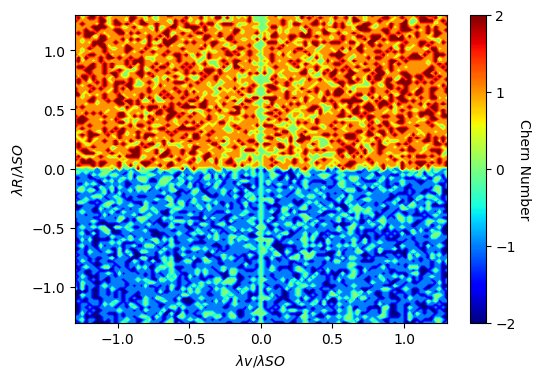

In [14]:
C0 = np.array([ [ column[0] for column in row] for row in Chern])
fig,ax=plt.subplots(figsize=(6,4))
X,Y = linspace(-λSO,λSO,101),linspace(-λSO,λSO,101)
X, Y = np.meshgrid(X, Y)
cp = ax.contourf(X, Y, C0,levels=np.linspace(C0.min(),C0.max(),300),cmap='jet')
cbar = colorbar(cp,ticks=linspace(C0.min(),C0.max(),5))
ax.set_xlabel('$λv/λSO$')
ax.set_ylabel('$λR/λSO$')
cbar.ax.set_ylabel('Chern Number', rotation=270, labelpad = 11)

Done.



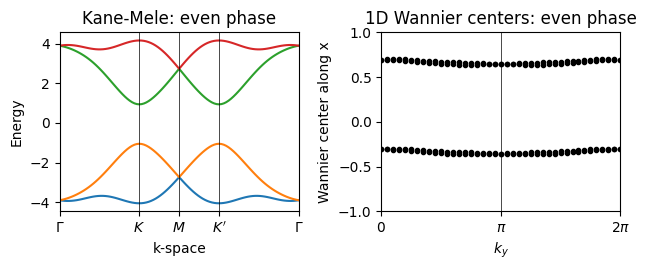

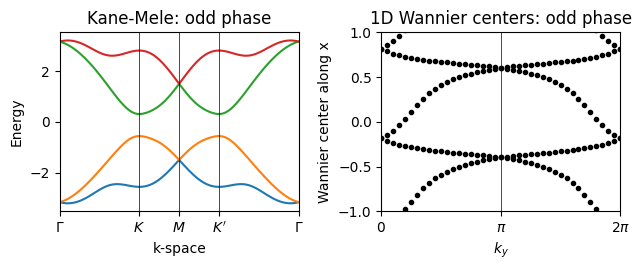

In [15]:
#!/usr/bin/env python

# Two dimensional tight-binding 2D Kane-Mele model
# C.L. Kane and E.J. Mele, PRL 95, 146802 (2005) Eq. (1)

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pytb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

def get_kane_mele(topological):
  "Return a Kane-Mele model in the normal or topological phase."

  # define lattice vectors
  lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
  # define coordinates of orbitals
  orb=[[1./3.,1./3.],[2./3.,2./3.]]

  # make two dimensional tight-binding Kane-Mele model
  ret_model=tb_model(2,2,lat,orb,nspin=2)

  # set model parameters depending on whether you are in the topological
  # phase or not
  if topological=="even":
    esite=2.5
  elif topological=="odd":
    esite=1.0
  # set other parameters of the model
  thop=1.0
  spin_orb=0.6*thop*0.5
  rashba=0.25*thop

  # set on-site energies
  ret_model.set_onsite([esite,(-1.0)*esite])

  # set hoppings (one for each connected pair of orbitals)
  # (amplitude, i, j, [lattice vector to cell containing j])

  # useful definitions
  sigma_x=np.array([0.,1.,0.,0])
  sigma_y=np.array([0.,0.,1.,0])
  sigma_z=np.array([0.,0.,0.,1])

  # spin-independent first-neighbor hoppings
  ret_model.set_hop(thop, 0, 1, [ 0, 0])
  ret_model.set_hop(thop, 0, 1, [ 0,-1])
  ret_model.set_hop(thop, 0, 1, [-1, 0])

  # second-neighbour spin-orbit hoppings (s_z)
  ret_model.set_hop(-1.j*spin_orb*sigma_z, 0, 0, [ 0, 1])
  ret_model.set_hop( 1.j*spin_orb*sigma_z, 0, 0, [ 1, 0])
  ret_model.set_hop(-1.j*spin_orb*sigma_z, 0, 0, [ 1,-1])
  ret_model.set_hop( 1.j*spin_orb*sigma_z, 1, 1, [ 0, 1])
  ret_model.set_hop(-1.j*spin_orb*sigma_z, 1, 1, [ 1, 0])
  ret_model.set_hop( 1.j*spin_orb*sigma_z, 1, 1, [ 1,-1])

  # Rashba first-neighbor hoppings: (s_x)(dy)-(s_y)(d_x)
  r3h =np.sqrt(3.0)/2.0
  # bond unit vectors are (r3h,half) then (0,-1) then (-r3h,half)
  ret_model.set_hop(1.j*rashba*( 0.5*sigma_x-r3h*sigma_y), 0, 1, [ 0, 0], mode="add")
  ret_model.set_hop(1.j*rashba*(-1.0*sigma_x            ), 0, 1, [ 0,-1], mode="add")
  ret_model.set_hop(1.j*rashba*( 0.5*sigma_x+r3h*sigma_y), 0, 1, [-1, 0], mode="add")

  return ret_model

# now solve the model and find Wannier centers for both topological
# and normal phase of the model
for top_index in ["even","odd"]:

  # get the tight-binding model
  my_model=get_kane_mele(top_index)

  # list of nodes (high-symmetry points) that will be connected
  path=[[0.,0.],[2./3.,1./3.],[.5,.5],[1./3.,2./3.], [0.,0.]]
  # labels of the nodes
  label=(r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')
  (k_vec,k_dist,k_node)=my_model.k_path(path,101,report=False)

  # initialize figure with subplots
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,2.8))

  # solve for eigenenergies of hamiltonian on
  # the set of k-points from above
  evals=my_model.solve_all(k_vec)
  # plot bands
  ax1.plot(k_dist,evals[0])
  ax1.plot(k_dist,evals[1])
  ax1.plot(k_dist,evals[2])
  ax1.plot(k_dist,evals[3])
  ax1.set_title("Kane-Mele: "+top_index+" phase")
  ax1.set_xticks(k_node)
  ax1.set_xticklabels(label)
  ax1.set_xlim(k_node[0],k_node[-1])
  for n in range(len(k_node)):
    ax1.axvline(x=k_node[n],linewidth=0.5, color='k')
  ax1.set_xlabel("k-space")
  ax1.set_ylabel("Energy")

  #calculate my-array
  my_array=wf_array(my_model,[41,41])

  # solve model on a regular grid, and put origin of
  # Brillouin zone at [-1/2,-1/2]  point
  my_array.solve_on_grid([-0.5,-0.5])

  # calculate Berry phases around the BZ in the k_x direction
  # (which can be interpreted as the 1D hybrid Wannier centers
  # in the x direction) and plot results as a function of k_y
  #
  # Following the ideas in
  #   A.A. Soluyanov and D. Vanderbilt, PRB 83, 235401 (2011)
  #   R. Yu, X.L. Qi, A. Bernevig, Z. Fang and X. Dai, PRB 84, 075119 (2011)
  # the connectivity of these curves determines the Z2 index
  #
  wan_cent = my_array.berry_phase([0,1],dir=1,contin=False,berry_evals=True)
  wan_cent/=(2.0*np.pi)

  nky=wan_cent.shape[0]
  ky=np.linspace(0.,1.,nky)
  # draw shifted Wannier center positions
  for shift in range(-2,3):
    ax2.plot(ky,wan_cent[:,0]+float(shift),"k.")
    ax2.plot(ky,wan_cent[:,1]+float(shift),"k.")
  ax2.set_ylim(-1.0,1.0)
  ax2.set_ylabel('Wannier center along x')
  ax2.set_xlabel(r'$k_y$')
  ax2.set_xticks([0.0,0.5,1.0])
  ax2.set_xlim(0.0,1.0)
  ax2.set_xticklabels([r"$0$",r"$\pi$", r"$2\pi$"])
  ax2.axvline(x=.5,linewidth=0.5, color='k')
  ax2.set_title("1D Wannier centers: "+top_index+" phase")

  fig.tight_layout()
  #fig.savefig("kane_mele_"+top_index+".pdf")

print('Done.\n')